# Experiments 1-3


### Dataset:
- **Dataset:** 3.5m | 90º
- **Sizes:** small & mid
- **Split:** 240 px
- **Tags:** 5472 `plant-weed`
- **Train/Valid dist:** 66,6% / 33,3%

### Model:
- **Model:** `yolov8n` *(Nano)*
- **Epochs:** 100
- **Batch:** 64
- **Freeze:** 10

### Experiments:
1. small + mid
2. small
3. mid

## Init

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
root = "../../"
folder = "docs/Experimentos/2 Finetuning/1 set/runs/detect/"

In [6]:
# Ruta del archivo
file_path = "train/results.csv"
full_file_path = root+folder+file_path
full_file_path

'../docs/Experimentos/2 Finetuning/1 set/runs/detect/train/results.csv'

----

# Experiment 1 *(full dataset)*
### *3.5m | 90º | small + mid*

In [9]:
# Ruta del archivo
file_path = "train/results.csv"
full_file_path = root+folder+file_path

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df = pd.read_csv(full_file_path)
df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,17.2895,2.86264,3.29884,1.95424,0.01279,0.68928,0.02569,0.00848,2.63378,2.99687,1.74110,0.000440,0.000440,0.000440
1,2,28.4867,2.61513,2.04811,1.64211,0.23572,0.16222,0.11440,0.02960,2.67724,2.40015,1.79242,0.000891,0.000891,0.000891
2,3,38.9472,2.54296,1.87074,1.62431,0.29896,0.33227,0.18466,0.05243,2.66147,2.13828,1.75992,0.001333,0.001333,0.001333
3,4,50.2162,2.50934,1.83140,1.62503,0.26415,0.29065,0.17140,0.04735,2.76667,2.26624,1.91974,0.001766,0.001766,0.001766
4,5,61.2734,2.47957,1.76947,1.61986,0.25791,0.32027,0.19343,0.05221,2.69983,1.89460,1.86474,0.001921,0.001921,0.001921


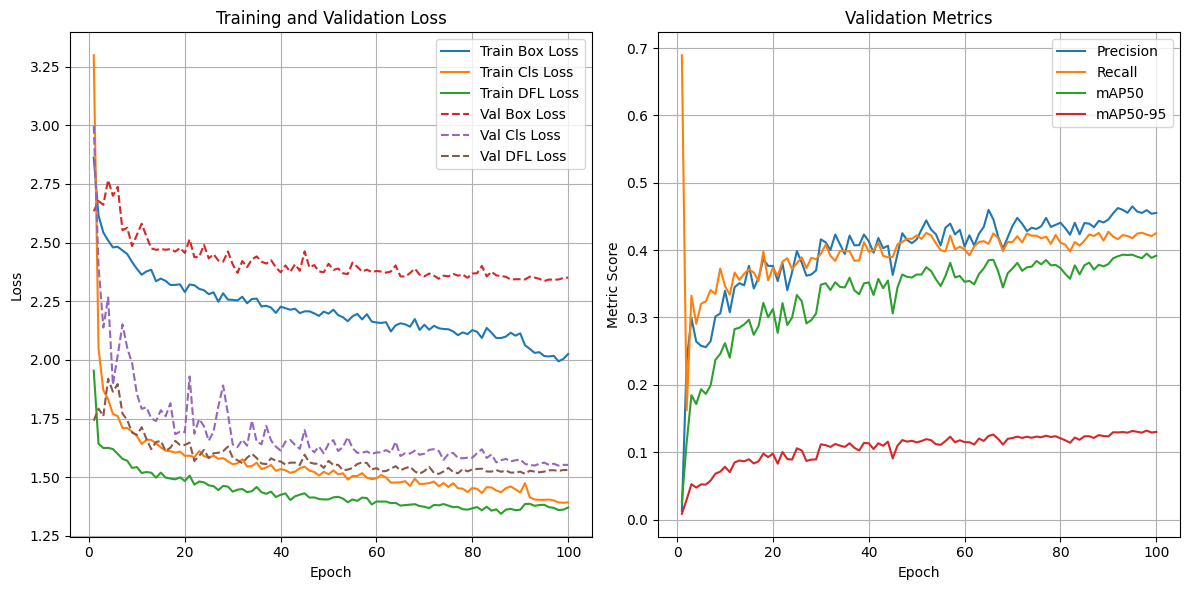

In [10]:
# Configurar el tamaño de las figuras
plt.figure(figsize=(12, 6))

# Graficar pérdidas de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()

# Graficar métricas de validación
plt.subplot(1, 2, 2)
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
plt.xlabel("Epoch")
plt.ylabel("Metric Score")
plt.title("Validation Metrics")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

**1. Pérdidas de entrenamiento y validación:**
- Se observa una tendencia decreciente en las pérdidas de entrenamiento (train/box_loss, train/cls_loss, train/dfl_loss), lo que indica que el modelo está aprendiendo.
- Las pérdidas de validación (val/box_loss, val/cls_loss, val/dfl_loss) también tienden a disminuir, aunque hay cierta variabilidad.

**2. Métricas de validación:**
- La precisión y el recall muestran una mejora en las primeras épocas, pero luego pueden estabilizarse o fluctuar.
- La métrica mAP50 y mAP50-95 aumentan con el tiempo, lo que sugiere una mejora en la capacidad del modelo para hacer predicciones correctas

Las métricas mAP50 y mAP50-95 en este contexto suelen referirse al conjunto de validación (val set), ya que el cálculo del Mean Average Precision (mAP) generalmente se realiza sobre datos no vistos para evaluar el rendimiento real del modelo.

En los registros de entrenamiento, típicamente:

- Las pérdidas (train/box_loss, train/cls_loss, etc.) se calculan sobre el conjunto de entrenamiento.
- Las métricas (metrics/precision(B), metrics/recall(B), metrics/mAP50(B), etc.) se calculan sobre el conjunto de validación.
- Las pérdidas de validación (val/box_loss, val/cls_loss, etc.) también reflejan el rendimiento en el conjunto de validación.

### Conclusiones


**1️. La pérdida y la métrica evalúan cosas diferentes**

- **La pérdida (Loss)** mide el error a nivel de predicción individual (por ejemplo, diferencias en coordenadas de bounding boxes y clasificación).  
- **El mAP (Mean Average Precision)** mide el rendimiento del modelo en términos de detección correcta (basado en IoU y umbrales de confianza).  
- Es posible que la pérdida no baje significativamente, pero el modelo se vuelva mejor en hacer predicciones útiles desde el punto de vista de la métrica de evaluación.  

**2️. El modelo mejora en precisión sin mejorar mucho en pérdida**

- A veces, el modelo aprende a hacer predicciones más consistentes sin que la pérdida baje notablemente.  
- Esto puede ocurrir si el modelo ya encontró una solución razonablemente buena y mejora en aspectos como la **confianza en las predicciones** o el **ajuste de umbrales de decisión**.  

**3️. El loss puede estar en una meseta (*plateau*)**  

- Es común que la pérdida se estanque en ciertos momentos del entrenamiento, incluso cuando el rendimiento del modelo sigue mejorando.  
- Esto puede indicar que el modelo está cerca de un óptimo y que ajustar hiperparámetros como la tasa de aprendizaje podría ayudar a seguir mejorando.  

**4️. Regularización y *trade-offs* en la función de pérdida**  

- Algunas funciones de pérdida están diseñadas para penalizar ciertas características del modelo, como la confianza excesiva en ciertas clases.  
- Si el modelo mejora en términos de **precisión y recall** sin cambiar mucho en la función de pérdida, podría significar que está **mejorando la distribución de sus predicciones sin reducir su error absoluto**.  

**¿Qué hacer para analizarlo mejor?** 

Si quieres entender más a fondo el comportamiento, podríamos:  
1. Analizar la distribución de **confianza en las predicciones** para ver si el modelo está ajustando mejor sus probabilidades.  
2. Revisar si el **IoU promedio** de los bounding boxes mejora, incluso si la pérdida no cambia mucho.  
3. Probar con una **tasa de aprendizaje más baja** para ver si la pérdida vuelve a disminuir.  

----

# Experiment 2 *(small weed)*
### *3.5m | 90º | small*

In [11]:
# Ruta del archivo
file_path = "train2/results.csv"
full_file_path = root+folder+file_path

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df = pd.read_csv(full_file_path)
df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,11.9486,2.16634,1.42909,1.31557,0.50772,0.44162,0.42967,0.13545,2.36404,1.53456,1.41486,0.000340,0.000340,0.000340
1,2,20.8119,2.13819,1.40386,1.28829,0.46923,0.43107,0.39995,0.13243,2.39713,1.50820,1.41965,0.000693,0.000693,0.000693
2,3,29.3795,2.15365,1.42473,1.29339,0.48093,0.43497,0.40858,0.12766,2.39223,1.59771,1.42310,0.001039,0.001039,0.001039
3,4,38.7384,2.21100,1.45759,1.31257,0.44330,0.43255,0.38208,0.12253,2.43516,1.54985,1.44773,0.001378,0.001378,0.001378
4,5,45.4232,2.20057,1.43461,1.31908,0.44217,0.41440,0.37484,0.12190,2.42373,1.54658,1.43874,0.001710,0.001710,0.001710


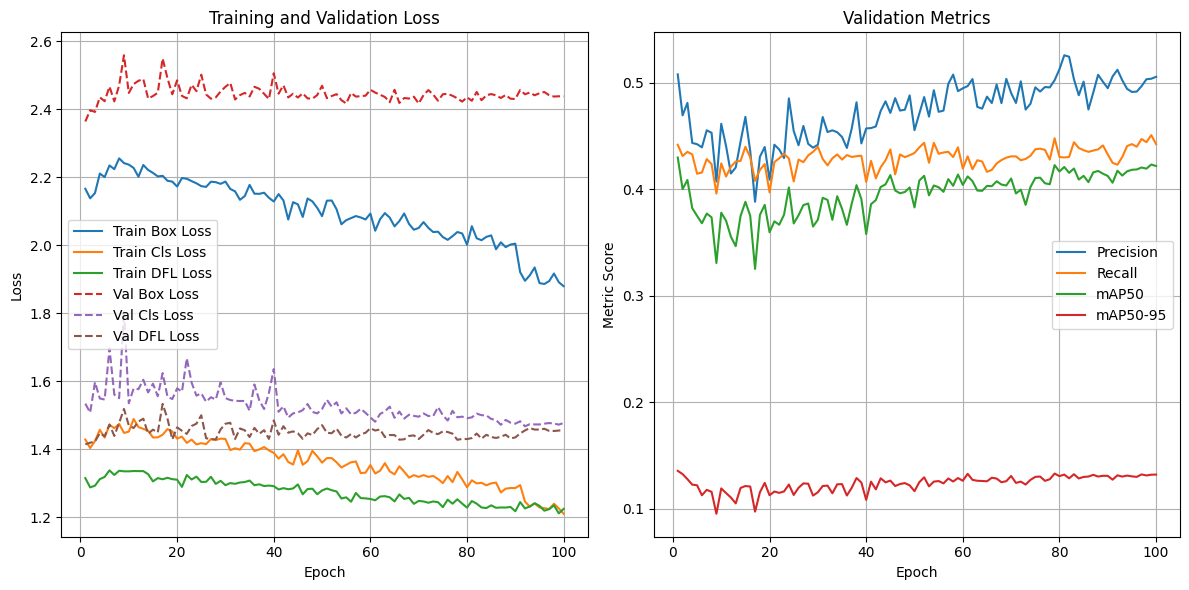

In [12]:
# Configurar el tamaño de las figuras
plt.figure(figsize=(12, 6))

# Graficar pérdidas de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()

# Graficar métricas de validación
plt.subplot(1, 2, 2)
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
plt.xlabel("Epoch")
plt.ylabel("Metric Score")
plt.title("Validation Metrics")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

----

# Experiment 3 *(medium weed)*
### *3.5m | 90º | mid*

In [13]:
# Ruta del archivo
file_path = "train3/results.csv"
full_file_path = root+folder+file_path

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df = pd.read_csv(full_file_path)
df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,7.45131,2.30010,1.76285,1.55897,0.35309,0.37063,0.29439,0.09324,2.41750,1.73619,1.70641,0.000100,0.000100,0.000100
1,2,11.32530,2.17290,1.65964,1.48705,0.44801,0.42616,0.38384,0.13055,2.24468,1.66612,1.64295,0.000218,0.000218,0.000218
2,3,17.89220,2.09069,1.54614,1.48614,0.42080,0.42986,0.36532,0.12693,2.24151,1.78846,1.66976,0.000333,0.000333,0.000333
3,4,21.29600,2.07441,1.50957,1.47628,0.39474,0.43439,0.35794,0.12197,2.24909,1.87155,1.65046,0.000446,0.000446,0.000446
4,5,24.85160,2.11613,1.47965,1.46611,0.41036,0.41999,0.36904,0.12656,2.27029,1.75931,1.63135,0.000557,0.000557,0.000557


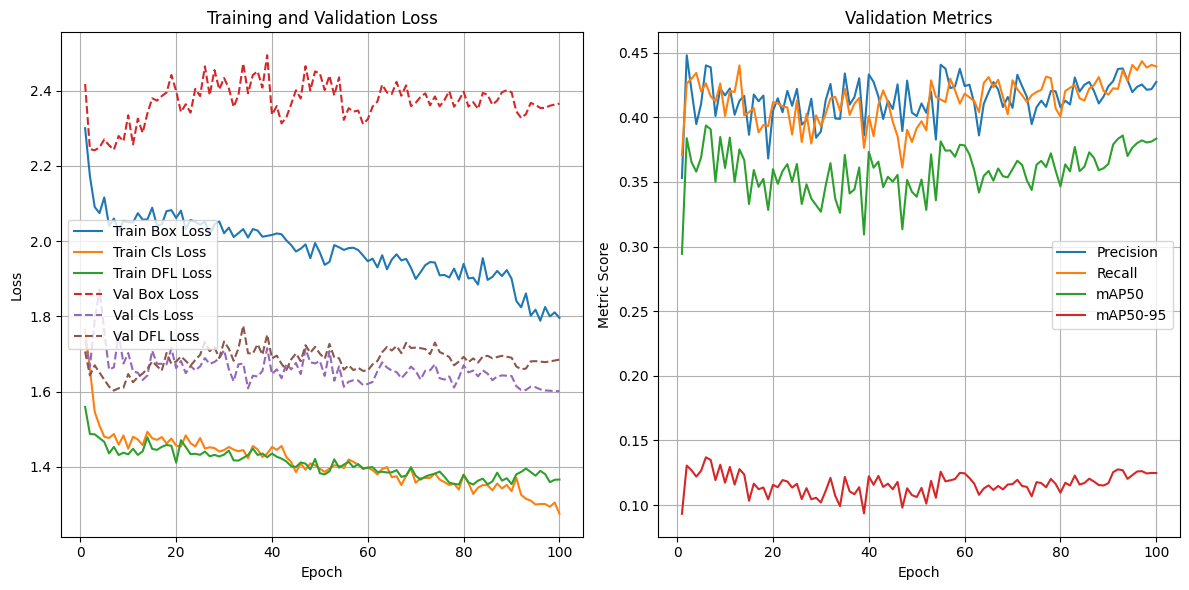

In [14]:
# Configurar el tamaño de las figuras
plt.figure(figsize=(12, 6))

# Graficar pérdidas de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()

# Graficar métricas de validación
plt.subplot(1, 2, 2)
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
plt.xlabel("Epoch")
plt.ylabel("Metric Score")
plt.title("Validation Metrics")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

----

# Conclusiones generales

…
